In [ ]:
### Distance Matrix to MDS

### Get data

In [80]:
import pandas as pd
import numpy as np

In [81]:
### Import distance matrix and remove Row labels
df = pd.read_table("Data/ssRNA_complete_genomes_100_subsample_1000.dist")
df = df.drop("#query", axis=1)
### Get filenames from headers
INDEX = list(df)
print(len(INDEX))

3900


### Get metadata

In [82]:
import pandas as pd
df_Accessions_100 = pd.read_csv("Data/df_ssRNA_complete_100_subsample.tsv", sep="\t")
len(df_Accessions_100)

3900

In [83]:
Acc_to_species = dict(zip(df_Accessions_100["accs"], df_Accessions_100["species"]))

In [84]:
Species = []
for Acc in INDEX:
    Sub_species.append(Acc_to_species[Acc])

In [85]:
df_Accessions_100['freq'] = df_Accessions_100.groupby('species')['species'].transform('count')
df_Accessions_100.head()

,Unnamed: 0,index,accs,source,description,seqlen,organism,division,date,biocategory,species,freq
0,1155227,1155227,KC131140.1,NEIGHBOR,"UNVERIFIED: Dengue virus 1 isolate ZH398, comp...",10668,Dengue virus 1,VRL,25-FEB-2013,EX,Dengue virus,100
1,491201,491201,FJ205883.1,NEIGHBOR,Dengue virus 1 isolate DENV-1/VN/BID-V1694/200...,10690,Dengue virus 1,VRL,02-JUN-2009,EX,Dengue virus,100
2,829806,829806,HM756275.1,NEIGHBOR,Dengue virus 3 isolate DENV-3/NI/BID-V4748/200...,10531,Dengue virus 3,VRL,20-JUL-2010,EX,Dengue virus,100
3,829807,829807,HM756276.1,NEIGHBOR,Dengue virus 3 isolate DENV-3/NI/BID-V4809/200...,10539,Dengue virus 3,VRL,20-JUL-2010,EX,Dengue virus,100
4,829808,829808,HM756277.1,NEIGHBOR,Dengue virus 3 isolate DENV-3/NI/BID-V4811/200...,10540,Dengue virus 3,VRL,20-JUL-2010,EX,Dengue virus,100


### Run KNN

In [86]:
from sklearn.neighbors import NearestNeighbors

In [92]:
N_neighbors=10

neigh = NearestNeighbors(n_neighbors=N_neighbors, metric="precomputed")
neigh.fit(df.values)
NN = neigh.kneighbors(df.values, return_distance=False)

In [93]:
Scores=[]
i=0
for entry in NN[:]:
    Score = float(0)
    Query_species = Acc_to_species[INDEX[i]]
#     print(Query_species)
    for pos in entry:
        Pos_species = Acc_to_species[INDEX[pos]]
#         print(Pos_species)
        if Query_species == Pos_species:
            Score += 1
    Scores.append(Score/N_neighbors)
    if Score/N_neighbors < 1.0:
        print(Query_species, Score)
        for pos in entry:
            Pos_species = Acc_to_species[INDEX[pos]]
            print("\t" + Pos_species)
        

    i+=1

Norwalk virus 8.0
	Norwalk virus
	Norwalk virus
	Norwalk virus
	Norwalk virus
	Norwalk virus
	Norwalk virus
	Norwalk virus
	Norwalk virus
	Porcine reproductive and respiratory syndrome virus
	Rhinovirus A
Orthohepevirus A 7.0
	Orthohepevirus A
	Orthohepevirus A
	Orthohepevirus A
	Orthohepevirus A
	Orthohepevirus A
	Orthohepevirus A
	Orthohepevirus A
	Zaire ebolavirus
	West Nile virus
	Porcine reproductive and respiratory syndrome virus
Rhinovirus A 3.0
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Enterovirus C
	Enterovirus C
	Enterovirus C
	Enterovirus A
	Enterovirus B
	Enterovirus A
	Enterovirus C
Rhinovirus A 7.0
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Zaire ebolavirus
	Avian coronavirus
	Porcine reproductive and respiratory syndrome virus
Rhinovirus A 9.0
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Rhinovirus A
	Enterovirus D
Orthohepevirus A 7.0
	Orthohepevi

In [99]:
df_Accessions_100["Score"] = Scores
df_Accessions_100.head()

,Unnamed: 0,index,accs,source,description,seqlen,organism,division,date,biocategory,species,freq,Scores,Score
0,1155227,1155227,KC131140.1,NEIGHBOR,"UNVERIFIED: Dengue virus 1 isolate ZH398, comp...",10668,Dengue virus 1,VRL,25-FEB-2013,EX,Dengue virus,100,1.0,1.0
1,491201,491201,FJ205883.1,NEIGHBOR,Dengue virus 1 isolate DENV-1/VN/BID-V1694/200...,10690,Dengue virus 1,VRL,02-JUN-2009,EX,Dengue virus,100,1.0,1.0
2,829806,829806,HM756275.1,NEIGHBOR,Dengue virus 3 isolate DENV-3/NI/BID-V4748/200...,10531,Dengue virus 3,VRL,20-JUL-2010,EX,Dengue virus,100,1.0,1.0
3,829807,829807,HM756276.1,NEIGHBOR,Dengue virus 3 isolate DENV-3/NI/BID-V4809/200...,10539,Dengue virus 3,VRL,20-JUL-2010,EX,Dengue virus,100,1.0,1.0
4,829808,829808,HM756277.1,NEIGHBOR,Dengue virus 3 isolate DENV-3/NI/BID-V4811/200...,10540,Dengue virus 3,VRL,20-JUL-2010,EX,Dengue virus,100,1.0,1.0


In [100]:
df_good_neighbors = df_Accessions_100[df_Accessions_100["Score"] == 1.0]
print(len(df_good_neighbors))

3846


In [101]:
Sub_positions = []
Sub_accessions = []
for Acc in df_good_neighbors["accs"]:
    if Acc in INDEX:
        Sub_positions.append(int(INDEX.index(Acc)))
        Sub_accessions.append(Acc)
print(len(Sub_positions))

3846


In [102]:
Sub_species = []
for Acc in Sub_accessions:
    Sub_species.append(Acc_to_species[Acc])

In [103]:
Submatrix = df.iloc[Sub_positions, Sub_positions]

In [104]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [105]:
def Run_DBSCAN(
                Distances, 
                Epsilon, 
                Min_group, 
                Labels_true
                ):

    db = DBSCAN(eps=float(Epsilon), min_samples= int(Min_group), metric='precomputed').fit(Distances)

    ### Parse Results from DBscan and Report ###
    Point_labels = db.labels_
    cluster_labels = np.unique(db.labels_)

    n_clusters_ = len(cluster_labels) - (1 if -1 in cluster_labels else 0)
    n_outliers_ = np.count_nonzero(Point_labels == -1)

    ### Calculate scores
    Homogeneity_score              =    metrics.homogeneity_score(Labels_true, Point_labels)
    Completeness_score             =    metrics.completeness_score(Labels_true, Point_labels)

    return [
            n_clusters_ , 
            n_outliers_, 
            Homogeneity_score, 
            Completeness_score, 
            ], Point_labels

In [106]:
def Run_Multi_DBSCAN(
                        Labels_true, 
                        Distances, 
                        EPS_low        = 0.01, 
                        EPS_high       = 0.1, 
                        EPS_incr       = 0.001, 
                        Min_group_low  = 5, 
                        Min_group_high = 10, 
                        Min_group_incr = 1
                    ):

    All_Point_labels = []
    Stats=[["Epsilon", "Min_group", "Clusters", "Outliers", "Homogeneity_score", "Completeness_score"]]

    for Min_group in range(int(Min_group_low), int(Min_group_high)+int(Min_group_incr), int(Min_group_incr)):
        for Epsilon in range(int(EPS_low * 1000), int(EPS_high * 1000) + int(EPS_incr * 1000), int(EPS_incr * 1000)):
            Stat, Point_labels = Run_DBSCAN(Distances, Epsilon * 0.001, Min_group, Labels_true)
            Stats.append([str(Epsilon * 0.001), str(Min_group)] + Stat)
            All_Point_labels.append(Point_labels)
#             print(str(Epsilon * 0.001), str(Min_group))
    return Stats, All_Point_labels

In [107]:
Distances = Submatrix.values
labels_true = Sub_species
Multi_DBSCAN = Run_Multi_DBSCAN(labels_true,Distances, EPS_high = 0.4, EPS_low = 0.01, EPS_incr=0.005)

In [108]:
Silhouette_scores=[]
i = 1
for Point_labels in Multi_DBSCAN[1]:
    silhouette_avg = silhouette_score(Distances, Point_labels)
    Silhouette_scores.append(Multi_DBSCAN[0][i][:2] + [silhouette_avg])
    i+=1

In [121]:
S_scores = pd.DataFrame(Silhouette_scores)

In [123]:
S_scores.max()[2]

0.7978915953737288

In [124]:
S_scores[S_scores[2] == S_scores.max()[2]]

,0,1,2
267,0.16,8,0.797892
268,0.165,8,0.797892
346,0.16,9,0.797892
347,0.165,9,0.797892
425,0.16,10,0.797892
426,0.165,10,0.797892


In [125]:
Distances = Submatrix.values
labels_true = Sub_species
db = DBSCAN(eps=float(.16), min_samples= int(9), metric='precomputed').fit(Distances)

In [126]:
Point_labels = db.labels_
cluster_labels = np.unique(db.labels_)
n_clusters_ = len(set(cluster_labels))
n_outliers_ = np.count_nonzero(cluster_labels == -1)

silhouette_avg        =    silhouette_score(Distances, Point_labels)
Homogeneity_score     =    metrics.homogeneity_score(labels_true, Point_labels)
Completeness_score    =    metrics.completeness_score(labels_true, Point_labels)

print("Silhouette score:\t",silhouette_avg)
print("Homogeneity score:\t",Homogeneity_score)
print("Completeness score:\t",Completeness_score)

Silhouette score:	 0.7978915953737288
Homogeneity score:	 0.9621260403707176
Completeness score:	 0.9749123787658892


In [127]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm


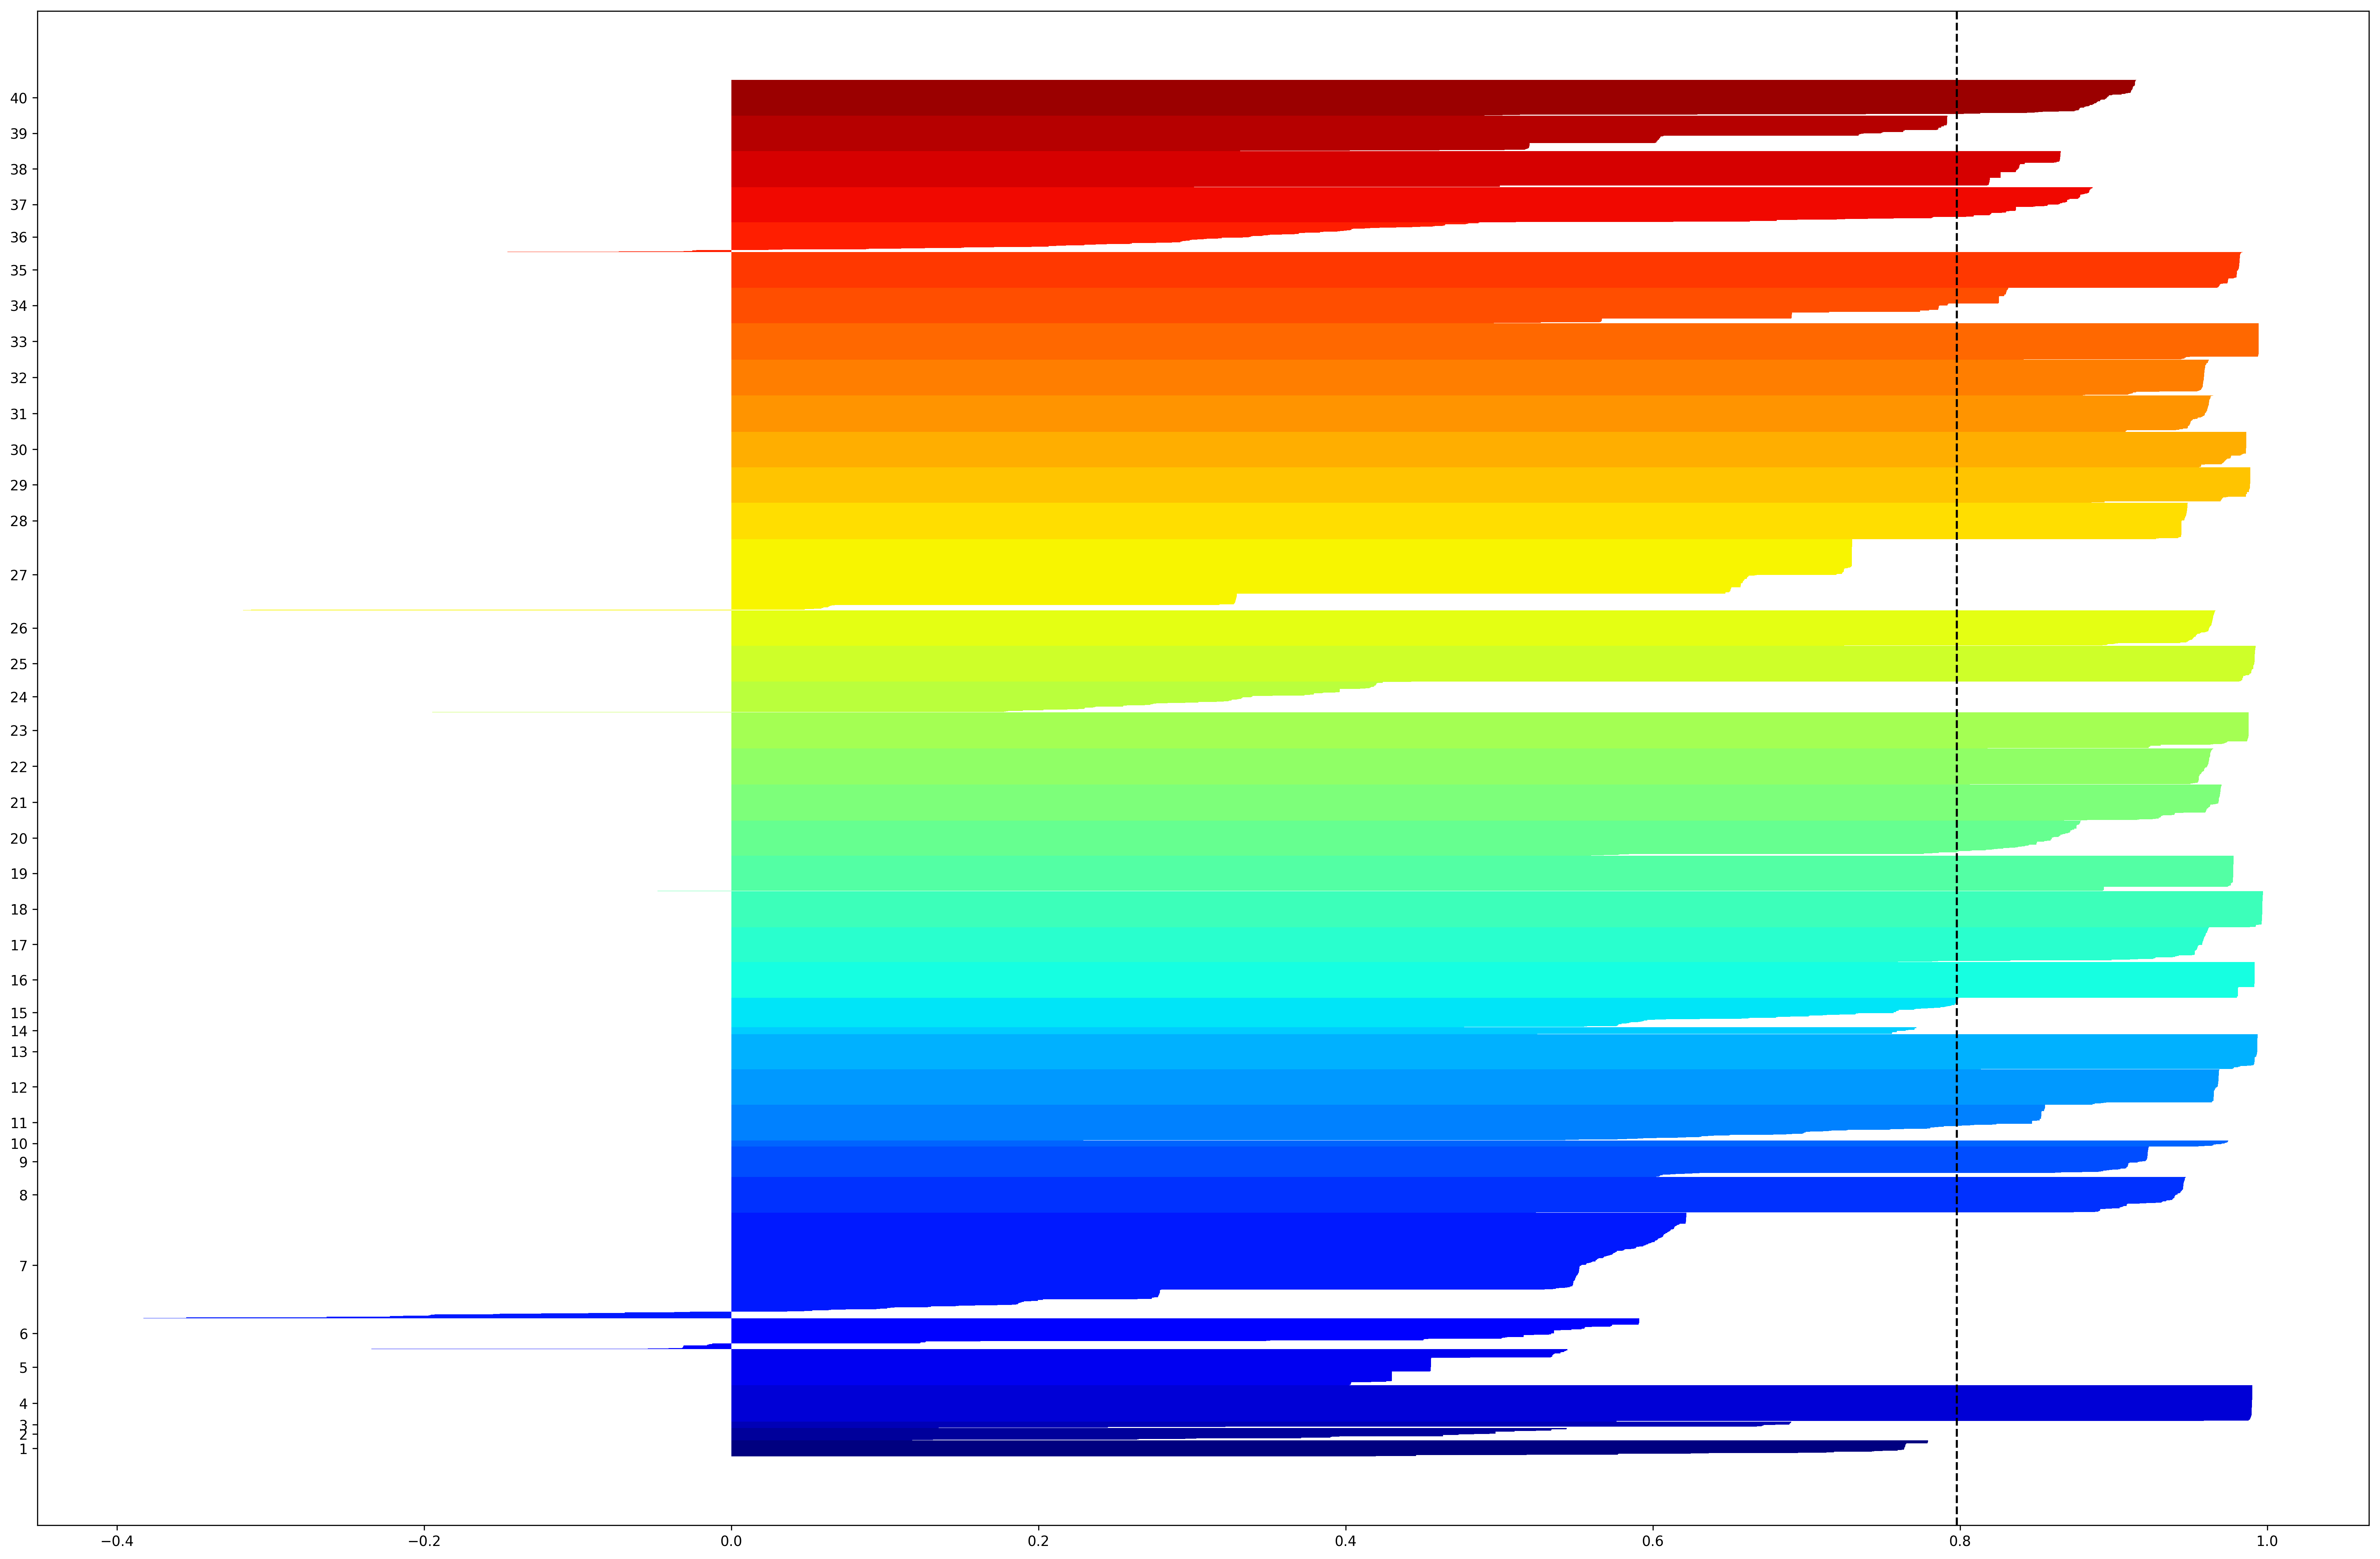

In [132]:
plt.rcParams["figure.figsize"] = [16,12]
fig=plt.figure(facecolor='white')
fig.set_size_inches(30, 20)
fig.set_dpi(300)

silhouette_vals = silhouette_samples(Distances, Point_labels)
y_ax_lower, y_ax_upper = 0, 0
yticks=[]

Scores=[]
for i, c in enumerate(cluster_labels[1:]):
    Cluster_score = []
    c_silhouette_vals = silhouette_vals[Point_labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters_)
    ax = plt.barh(range(y_ax_lower,y_ax_upper),
            c_silhouette_vals,
            height = 1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    Cluster_score.append(c_silhouette_vals)
    Scores.append([i, Cluster_score])
silhouette_avg = np.mean(silhouette_vals)
yline = plt.axvline(silhouette_avg,
            color = "black",
            linestyle="--")
yticks = plt.yticks(yticks, cluster_labels[1:] + 1)
fig.savefig('Visualizations/ssRNA_complete_100_subsample_mash_1000_silhoutte.pdf')